# Enhancing User Experience in ChatGPT: Sentiment Analysis of Twitter Data for Insights and Improvement

## Life cycle of the Project
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

## Problem Statement
The objective of the research project is to develop a sentiment analysis model that accurately categorizes the sentiment expressed in tweets as positive, negative, or neutral. By analyzing the sentiment of tweets, we aim to gain insights into user perceptions, satisfaction levels, and areas for potential improvement in the ChatGPT platform. This analysis can assist in refining the chatbot's responses, identifying common issues faced by users, and enhancing overall user engagement.

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# Load the dataset
dataset_path = r'/ChatGPT.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
0,0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0,NaN,NaN
1,1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for..."
2,2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...
3,3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar..."
4,4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...


In [8]:
# Display the first few rows of the dataset
df.tail()

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
478342,478261,2022-11-30 18:33:33+00:00,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...,https://twitter.com/david_teather/status/15980...,david_teather,2016-11-06 17:35:48+00:00,False,103.0,87.0,0,3,"Madison, WI",Creator of TikTokApi Python Package | General ...
478343,478262,2022-11-30 18:31:23+00:00,ChatGPT first look - https://t.co/16K2NlmOoY. ...,https://twitter.com/StuJLans/status/1598021893...,StuJLans,2009-06-01 12:28:01+00:00,False,754.0,281.0,2,3,Southeast Asia,"Build, test, experiment, deploy and enjoy the ..."
478344,478263,2022-11-30 18:26:58+00:00,OK so @OpenAI's new #ChatGPT can basically jus...,https://twitter.com/GuyP/status/15980207810655...,GuyP,2006-11-18 18:39:45+00:00,False,32709.0,5611.0,4002,23176,London,building things with #AI 🤖 #DALLE & #MidJourne...
478345,478264,2022-11-30 18:22:04+00:00,Just in! \n#ChatGPT - research early stage GPT...,https://twitter.com/mssawan/status/15980195482...,mssawan,2009-11-10 08:45:08+00:00,False,170.0,246.0,1,1,United Kingdom - London,"Co-Founder, CIO & COO @ IDWise - Trust but ver..."
478346,478265,2022-11-30 18:13:41+00:00,#ai Models are set to become the search engine...,https://twitter.com/ttuccoo/status/15980174391...,ttuccoo,2011-09-13 21:30:33+00:00,False,121.0,402.0,1,2,Montréal,All things SEO + Ai - Random Facts - cofounder...


In [9]:
#Shape of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.shape

Number of rows: 478347
Number of columns: 13


(478347, 13)

In [10]:
df.describe()

,UserFollowers,UserFriends
count,4.782660e+05,4.782660e+05
mean,1.994619e+04,2.169194e+03
std,3.228404e+05,1.255664e+04
min,0.000000e+00,0.000000e+00
25%,7.500000e+01,1.100000e+02
50%,4.400000e+02,4.330000e+02
75%,2.159000e+03,1.376000e+03
max,1.773959e+07,1.168327e+06


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478347 entries, 0 to 478346
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     478309 non-null  object 
 1   Date           478329 non-null  object 
 2   Tweet          478295 non-null  object 
 3   Url            478266 non-null  object 
 4   User           478266 non-null  object 
 5   UserCreated    478266 non-null  object 
 6   UserVerified   478266 non-null  object 
 7   UserFollowers  478266 non-null  float64
 8   UserFriends    478266 non-null  float64
 9   Retweets       478240 non-null  object 
 10  Likes          478266 non-null  object 
 11  Location       358836 non-null  object 
 12  Description    455383 non-null  object 
dtypes: float64(2), object(11)
memory usage: 47.4+ MB


In [12]:
df.dtypes

Unnamed: 0        object
Date              object
Tweet             object
Url               object
User              object
UserCreated       object
UserVerified      object
UserFollowers    float64
UserFriends      float64
Retweets          object
Likes             object
Location          object
Description       object
dtype: object

In [13]:
# Find unique values and their counts in each column
unique_values_counts = {col: df[col].nunique() for col in df.columns}
unique_values_counts

{'Unnamed: 0': 478309,
 'Date': 460103,
 'Tweet': 473686,
 'Url': 478242,
 'User': 199312,
 'UserCreated': 199248,
 'UserVerified': 9,
 'UserFollowers': 23864,
 'UserFriends': 9658,
 'Retweets': 606,
 'Likes': 1098,
 'Location': 44270,
 'Description': 184337}

In [14]:
unique_user_verified = df['UserVerified'].value_counts()
print(unique_user_verified)

UserVerified
False    441467
False     19112
True      17175
True        483
198          23
131           3
988           1
777           1
313           1
Name: count, dtype: int64


### Let's preprocess the data:

- Convert date columns to datetime format.
- Handle missing values.
- Clean the tweet text.

In [15]:
# Convert date columns to datetime format, ignoring errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['UserCreated'] = pd.to_datetime(df['UserCreated'], errors='coerce')

# Fill missing values in 'Location' and 'Description' columns with empty strings
df['Location'].fillna('', inplace=True)
df['Description'].fillna('', inplace=True)

# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478347 entries, 0 to 478346
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Unnamed: 0     478309 non-null  object             
 1   Date           478266 non-null  datetime64[ns, UTC]
 2   Tweet          478295 non-null  object             
 3   Url            478266 non-null  object             
 4   User           478266 non-null  object             
 5   UserCreated    478237 non-null  datetime64[ns, UTC]
 6   UserVerified   478266 non-null  object             
 7   UserFollowers  478266 non-null  float64            
 8   UserFriends    478266 non-null  float64            
 9   Retweets       478240 non-null  object             
 10  Likes          478266 non-null  object             
 11  Location       478347 non-null  object             
 12  Description    478347 non-null  object             
dtypes: datetime64[ns, UTC](2), fl

##### Handle Duplicate Data

In [16]:
# Check for duplicate rows
duplicates = df.duplicated()

# Number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows (if any)
duplicate_rows = df[duplicates]
duplicate_rows

Number of duplicate rows: 37


,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
12383,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
12503,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
12508,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
12949,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
52806,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
73396,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
73500,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
74436,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
75068,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,
75596,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,,


In [17]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify removal
num_duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {num_duplicates_after}")

#Display basic info of the cleaned dataset
df_cleaned.info()

Number of duplicate rows after cleaning: 0
<class 'pandas.core.frame.DataFrame'>
Index: 478310 entries, 0 to 478346
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Unnamed: 0     478309 non-null  object             
 1   Date           478266 non-null  datetime64[ns, UTC]
 2   Tweet          478295 non-null  object             
 3   Url            478266 non-null  object             
 4   User           478266 non-null  object             
 5   UserCreated    478237 non-null  datetime64[ns, UTC]
 6   UserVerified   478266 non-null  object             
 7   UserFollowers  478266 non-null  float64            
 8   UserFriends    478266 non-null  float64            
 9   Retweets       478240 non-null  object             
 10  Likes          478266 non-null  object             
 11  Location       478310 non-null  object             
 12  Description    478310 non-null  object          

In [18]:
# Clean up 'UserVerified' column to ensure proper boolean values
df['UserVerified'] = df['UserVerified'].astype(str).str.strip().map({'False': False, 'True': True})

# Exploratory Data Analysis (EDA)

**Common Topics and Sentiment:**

- What are the most common topics or themes discussed in positive, negative, and neutral tweets about #ChatGPT, and how do these topics influence sentiment?

In [19]:
# count the verified and non verified users
unique_user_verified = df['UserVerified'].value_counts()
print(unique_user_verified)

UserVerified
False    460579
True      17658
Name: count, dtype: int64


In [20]:
 # Get the mean of UserFollowers column i.e the average user followers
averageUserFollowers = df['UserFollowers'].mean()
print(f" Average User Followers: {averageUserFollowers}")

# Get the median of UserFollowers column 
medianUserFollowers = df['UserFollowers'].median()
print(f" Median of User Followers: {medianUserFollowers}")

# Get the mean of UserFriends column i.e the average user friends
averageUserFriends = df['UserFriends'].mean()
print(f" Average User Friends: {averageUserFriends}")

# Convert 'Retweets' to numeric, coercing errors to NaN
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')
# Get the mean of 'Retweets' column, skipping NaN values
mean_retweets = df['Retweets'].mean()
print(f" Average Retweets: {mean_retweets}")

# Convert 'Likes to numeric, coercing errors to NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
# Get the mean of 'Retweets' column, skipping NaN values
mean_likes = df['Likes'].mean()
print(f" Average Likes for tweets: {mean_likes}")

 Average User Followers: 19946.18913533473
 Median of User Followers: 440.0
 Average User Friends: 2169.1940970087776
 Average Retweets: 1.3510247011419025
 Average Likes for tweets: 5.506326361197481


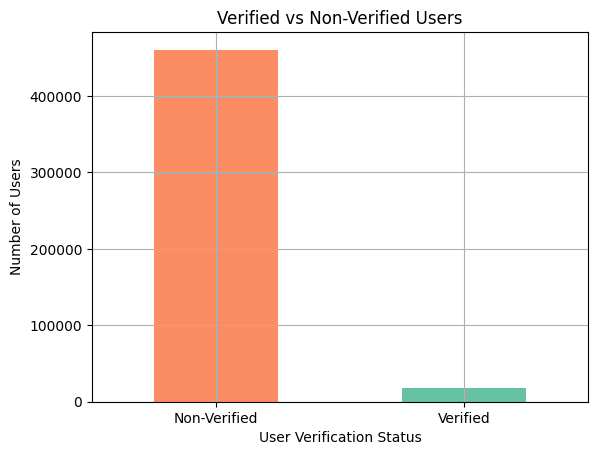

In [21]:
# bar chart to visualize the count of verified and non-verified users
unique_user_verified.plot(kind='bar', color=['#fc8d62', '#66c2a5'])
plt.title('Verified vs Non-Verified Users')
plt.xlabel('User Verification Status')
plt.ylabel('Number of Users')
plt.xticks(ticks=[0, 1], labels=['Non-Verified', 'Verified'], rotation=0)
plt.grid(True)
plt.show()

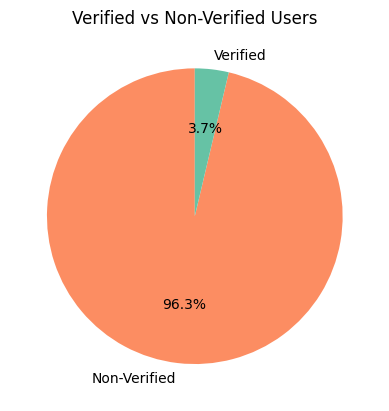

In [36]:
# pie chart to visualize the count of verified and non-verified users
unique_user_verified.plot(kind='pie', colors=['#fc8d62', '#66c2a5'], labels=['Non-Verified', 'Verified'], autopct='%1.1f%%', startangle=90)
plt.title('Verified vs Non-Verified Users')
plt.ylabel('')  # Hide y-label for better visualization of the pie chart
plt.show()


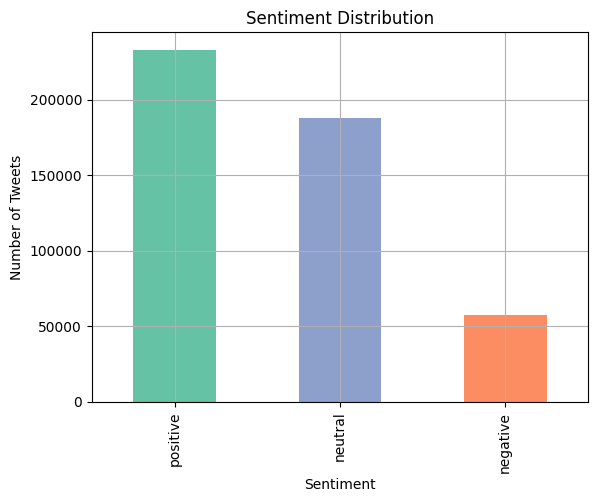

In [37]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to categorize sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'
# Convert the 'Tweet' column to string type to handle non-string values
df['Tweet'] = df['Tweet'].astype(str)

# Apply the function to categorize sentiment
df['Sentiment'] = df['Tweet'].apply(get_sentiment)

# Display the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Define the colors for each sentiment category
colors = ['#66c2a5' if sentiment == 'positive' else '#fc8d62' if sentiment == 'negative' else '#8da0cb' for sentiment in sentiment_distribution.index]

sentiment_distribution.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

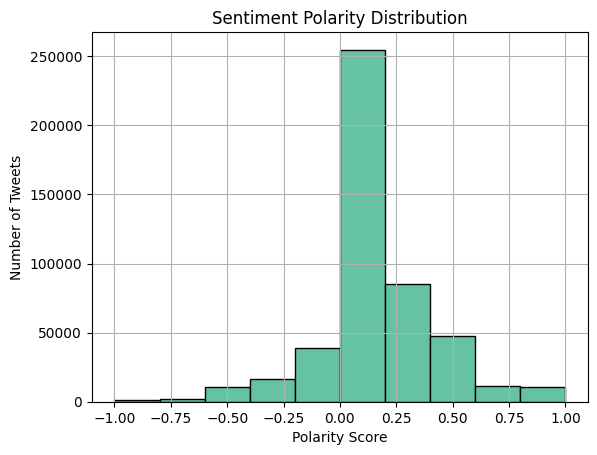

In [38]:
#from textblob import TextBlob
#import matplotlib.pyplot as plt

def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Convert the 'Tweet' column to string type to handle non-string values
df['Tweet'] = df['Tweet'].astype(str)

# Apply the function to get polarity scores
df['Polarity'] = df['Tweet'].apply(get_polarity)

# Plotting the histogram of polarity scores
plt.hist(df['Polarity'], bins=10, range=(-1, 1), edgecolor='black', color='#66c2a5')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

### Using BERT Transformers

cpu
Processed 300 out of 478347 tweets...
Processed 200 out of 478347 tweets...
Processed 800 out of 478347 tweets...
Processed 100 out of 478347 tweets...
Processed 700 out of 478347 tweets...
Processed 500 out of 478347 tweets...
Processed 1000 out of 478347 tweets...
Processed 600 out of 478347 tweets...
Processed 900 out of 478347 tweets...
Processed 400 out of 478347 tweets...
Processed 1100 out of 478347 tweets...
Processed 1200 out of 478347 tweets...
Processed 1300 out of 478347 tweets...
Processed 1600 out of 478347 tweets...
Processed 1500 out of 478347 tweets...
Processed 1400 out of 478347 tweets...
Processed 1700 out of 478347 tweets...
Processed 1900 out of 478347 tweets...
Processed 1800 out of 478347 tweets...
Processed 2000 out of 478347 tweets...
Processed 2100 out of 478347 tweets...
Processed 2200 out of 478347 tweets...
Processed 2300 out of 478347 tweets...
Processed 2400 out of 478347 tweets...
Processed 2500 out of 478347 tweets...
Processed 2600 out of 478347 t

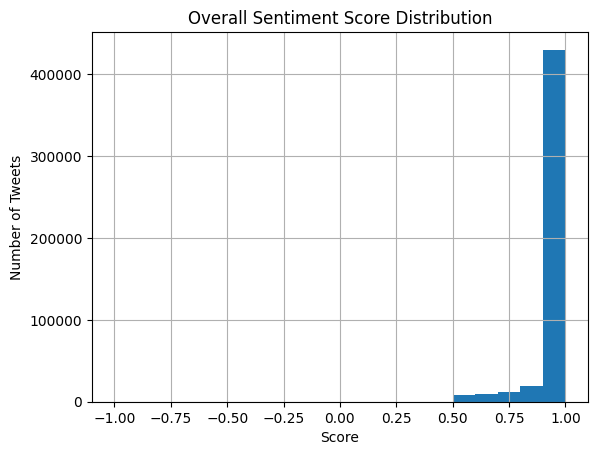


Sentiment Distribution:
Sentiment
neutral     351537
positive    126810
Name: count, dtype: int64


In [39]:
#Parallelized version
from transformers import pipeline
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed

# Check for CUDA availability and set the device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

# Initialize sentiment analysis pipeline with the device parameter
sentiment_pipeline = pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english", 
    device=0 if torch.cuda.is_available() else -1  # Use 0 for the first GPU, -1 for CPU
)

# Function to categorize sentiment using the transformer model
def get_sentiment(text):
    result = sentiment_pipeline(text)
    label = result[0]['label']
    score = result[0]['score']
    
    # Adjust threshold to classify as neutral
    if label == 'POSITIVE' and score > 0.05:
        return 'positive', score
    elif label == 'NEGATIVE' and score < -0.05:
        return 'negative', score
    else:
        return 'neutral', score


# Process data in parallel
def process_batch(batch):
    return [get_sentiment(tweet) for tweet in batch]

# Initialize ThreadPoolExecutor
batch_size = 100
total_tweets = len(df)
num_workers = 10  # Adjust based on your system's capability

results = []
with ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = {executor.submit(process_batch, df['Tweet'].iloc[i:i+batch_size].tolist()): i 
               for i in range(0, total_tweets, batch_size)}
    for future in as_completed(futures):
        batch_index = futures[future]
        batch_results = future.result()
        results.extend(batch_results)
        print(f"Processed {min(batch_index+batch_size, total_tweets)} out of {total_tweets} tweets...")

# Assign results back to the DataFrame
df['Sentiment'], df['Score'] = zip(*results)

# Display the distribution of sentiment scores
plt.hist(df['Score'], bins=20, range=(-1, 1))  # Adjust bins and range as needed
plt.title('Overall Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# Optionally, print the sentiment distribution counts
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


In [44]:
df.to_csv('label_data.csv',index=False)

**Creating word cloud for the most frequently occurring words in the tweets**

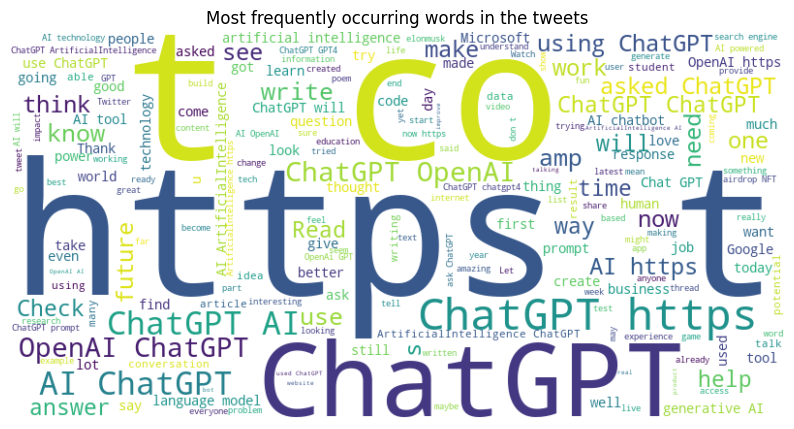

In [22]:
from wordcloud import WordCloud

# Convert 'Tweet' column to string and handle missing values
df['Tweet'] = df['Tweet'].astype(str).fillna('')

# Concatenate all tweets into a single string
tweet_text = ' '.join(df['Tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently occurring words in the tweets')
plt.show()

Emoji cloud

In [23]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emoji

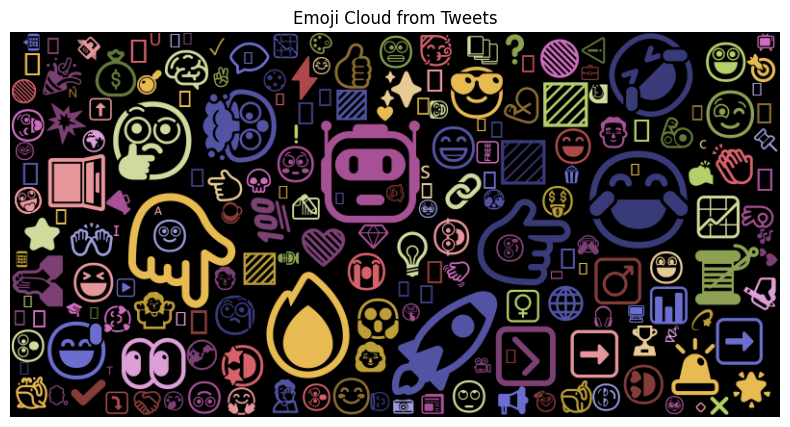

In [25]:
# Define emoji pattern
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# Function to extract emojis using the defined pattern
def extract_emojis(s):
    return ''.join(emoji_pattern.findall(s))

# Extract emojis from tweets
df['emojis'] = df['Tweet'].apply(extract_emojis)

# Combine all emojis into one string
all_emojis = ' '.join(df['emojis'])

# Count emoji frequencies
emoji_counter = Counter(all_emojis)

# Create a WordCloud with a font that supports emojis (System Font Example for Windows)
emoji_cloud = WordCloud(width=800, height=400, max_words=200, colormap='tab20b',
                        font_path=r'D:\text_modeling\SEGUIEMJ.TTF').generate_from_frequencies(emoji_counter)

# Plot the emoji cloud
plt.figure(figsize=(10, 5))
plt.imshow(emoji_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Emoji Cloud from Tweets')
plt.show()

**Tweet Activity towards #ChatGPT Over Time:**

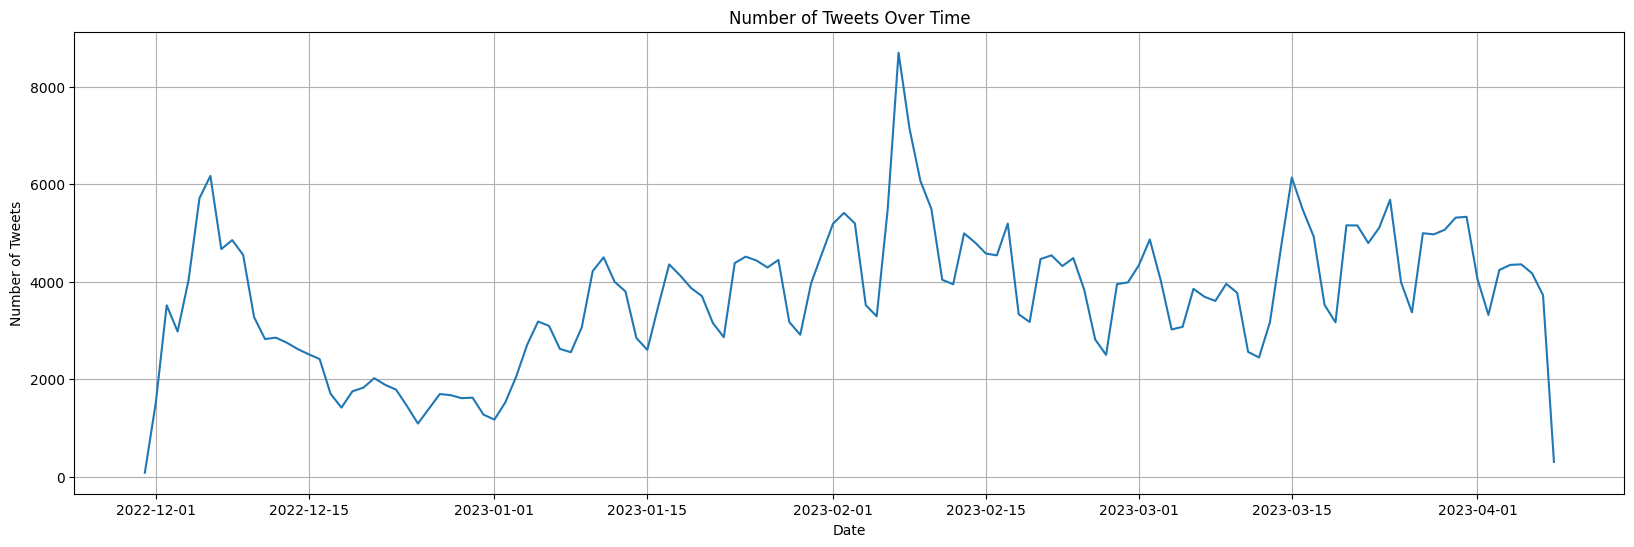

In [51]:
# Group by date and count the number of tweets per day
tweets_per_day = df.groupby(df['Date'].dt.date).size()

# Plot the number of tweets over time
plt.figure(figsize=(20, 6))
tweets_per_day.plot(kind='line')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

**User Demographics and Sentiment:**
- Are there specific user demographics (verified users, users with a high follower count, etc.) that tend to express more positive or negative sentiment towards #ChatGPT?

In [53]:
# Ensuring 'UserVerified' to boolean
df['UserVerified'] = df['UserVerified'].astype('bool')

# Group by verified status and count the number of tweets
tweets_by_verified = df.groupby('UserVerified').size()

# Display the count
print(tweets_by_verified)

print(df['Tweet'])

UserVerified
False    460579
True      17768
dtype: int64
0         #ChatGPT If only there were a movie or somethi...
1         Workshop Description: In this workshop, you wi...
2         New Post at AiNewsDrop!\n\nChatGPT is a doctor...
3         OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...
4         "Classical art" is struggling - not changed th...
                                ...                        
478342    @OpenAI 's new #ChatGPT is insane\nPrompt: An ...
478343    ChatGPT first look - https://t.co/16K2NlmOoY. ...
478344    OK so @OpenAI's new #ChatGPT can basically jus...
478345    Just in! \n#ChatGPT - research early stage GPT...
478346    #ai Models are set to become the search engine...
Name: Tweet, Length: 478347, dtype: object


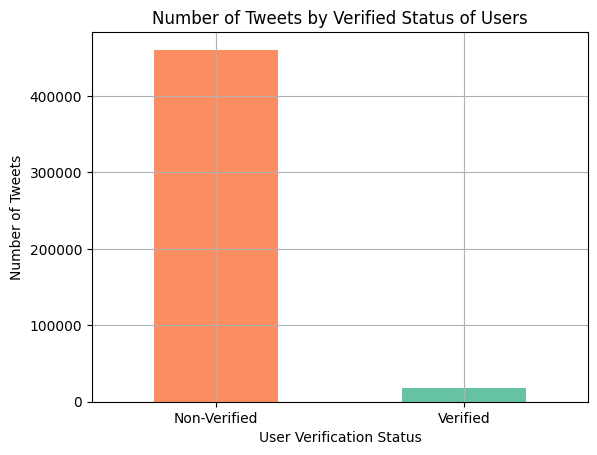

In [54]:
# bar chart to visualize the count of tweets by verified and non-verified users
tweets_by_verified.plot(kind='bar', color=['#fc8d62', '#66c2a5'])
plt.title('Number of Tweets by Verified Status of Users')
plt.xlabel('User Verification Status')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Non-Verified', 'Verified'], rotation=0)
plt.grid(True)
plt.show()


Sentiment     neutral  positive
UserVerified                   
False          338299    122280
True            13238      4530


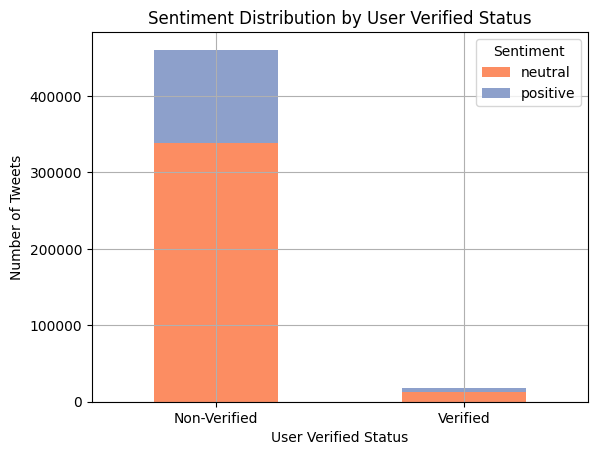

In [55]:
# Group by 'UserVerified' and 'Sentiment' and count the occurrences
sentiment_distribution = df.groupby(['UserVerified', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_distribution)

# Plot the sentiment distribution by user verified status
sentiment_distribution.plot(kind='bar', stacked=True, color=['#fc8d62', '#8da0cb', '#66c2a5'])
plt.title('Sentiment Distribution by User Verified Status')
plt.xlabel('User Verified Status')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Non-Verified', 'Verified'], rotation=0)
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


In [56]:
# Let's define high follower count as a figure above the median which is 440
followers = 1000

# Create a new column to categorize users based on follower count
df['HighFollowerCount'] = df['UserFollowers'] > followers


Sentiment          neutral  positive
HighFollowerCount                   
False               221739     81237
True                129798     45573


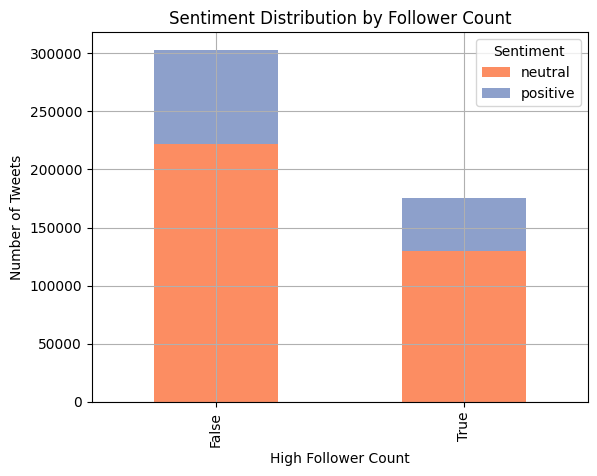

In [57]:
# Group by high follower count and sentiment
tweets_by_follower_count = df.groupby('HighFollowerCount')['Sentiment'].value_counts().unstack().fillna(0)
print(tweets_by_follower_count)

# Plot the number of tweets by follower count category
tweets_by_follower_count.plot(kind='bar', stacked=True, color=['#fc8d62', '#8da0cb', '#66c2a5'])
plt.title('Sentiment Distribution by Follower Count')
plt.xlabel('High Follower Count')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

**Interaction and Sentiment:**
- How do factors such as retweet count, likes, and user interaction correlate with the sentiment expressed in tweets about #ChatGPT?

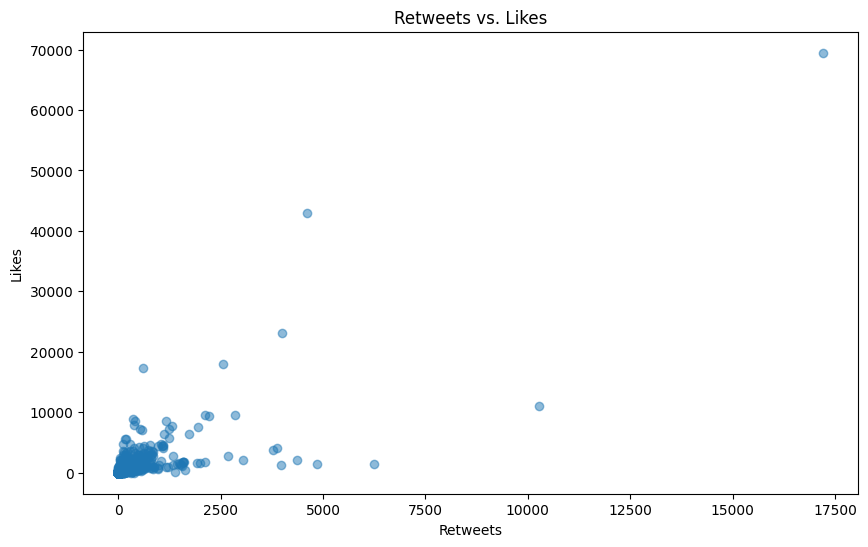

In [58]:
# Convert 'Retweets' and 'Likes' columns to numeric type
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# Drop rows with NaN values in 'Retweets' or 'Likes' columns
df = df.dropna(subset=['Retweets', 'Likes'])

# Scatter plot of retweets vs. likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Retweets'], df['Likes'], alpha=0.5)
plt.title('Retweets vs. Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.show()

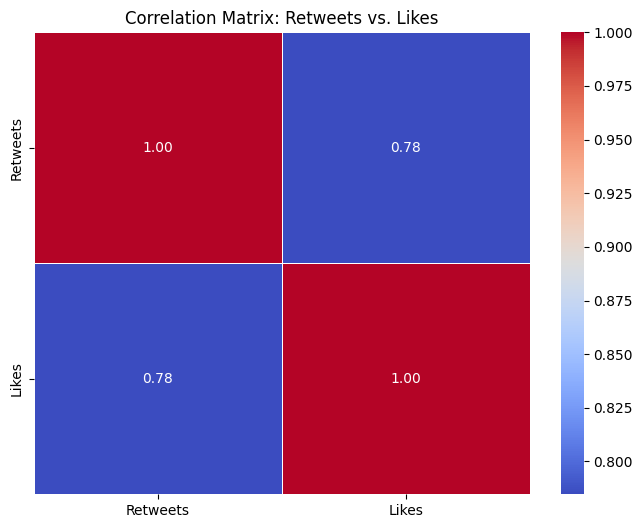

,Retweets,Likes
Retweets,1.000000,0.784708
Likes,0.784708,1.000000


In [59]:
# Calculate correlation between retweets, likes, and user interaction
correlation_matrix = df[['Retweets', 'Likes']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: Retweets vs. Likes')
plt.show()

correlation_matrix


**Geographical Sentiment Variation:**
- How does sentiment towards #ChatGPT vary across different geographical locations as indicated by user-provided location information?

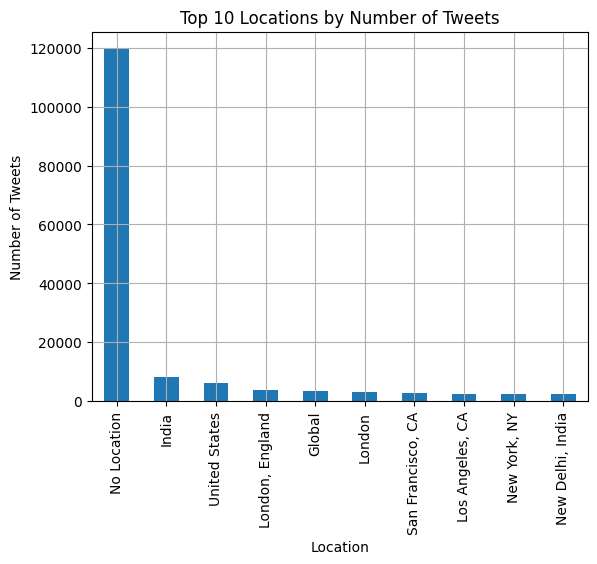

In [60]:
# Replace missing or empty values in 'Location' with "No Location"
df['Location'] = df['Location'].fillna('No Location').replace('', 'No Location')

# Group by location and count the number of tweets per location
tweets_by_location = df.groupby('Location').size().sort_values(ascending=False).head(10)

# Plot the number of tweets by location
tweets_by_location.plot(kind='bar')
plt.title('Top 10 Locations by Number of Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

**Key Factors Influencing User Sentiment:**
- What are the key factors influencing user sentiment towards #ChatGPT, and how do these factors contribute to overall user satisfaction?

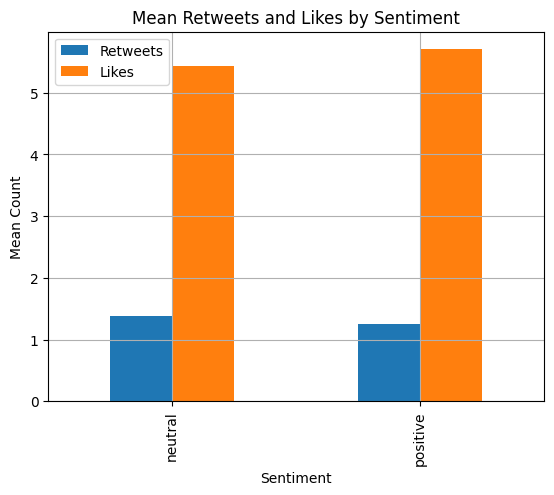

In [61]:
# Analyze key factors influencing sentiment
# For simplicity, let's consider retweets and likes as key factors

# Group by sentiment and calculate mean retweets and likes
mean_interaction_by_sentiment = df.groupby('Sentiment')[['Retweets', 'Likes']].mean()

mean_interaction_by_sentiment.plot(kind='bar')
plt.title('Mean Retweets and Likes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Count')
plt.grid(True)
plt.show()

In [62]:
# Drop the unnecessary column
#df.drop(columns=['SentimentPolarity'], inplace=True)

# Display the first few rows after dropping the column
df.head()

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description,Sentiment,Polarity,Score,emojis,HighFollowerCount
0,0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0.0,No Location,,neutral,0.000000,0.998405,,False
1,1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0.0,No Location,"University webinars, speech videos, & news for...",neutral,0.466667,0.998299,👉,True
2,2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0.0,No Location,I'm up almost 24/7 hunting for AI News\n\nWith...,positive,0.170455,0.995446,🤖🩺,False
3,3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0.0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar...",positive,0.000000,0.999157,,False
4,4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2.0,Beograd Navodni,Mediji i milosrdje\n\n ...,neutral,0.200000,0.997341,,False


**What is the average number of followers for verified and non-verified users?**


In [64]:
# Average number of followers by verified status
average_followers = df.groupby('UserVerified')['UserFollowers'].mean()
print("Average Number of Followers by Verified Status:")
print(average_followers)

Average Number of Followers by Verified Status:
UserVerified
False      4710.857139
True     417366.754049
Name: UserFollowers, dtype: float64


**What is the distribution of tweets over time?**

In [65]:
# Distribution of tweets over time
tweets_over_time = df['Date'].dt.date.value_counts().sort_index()
print("Distribution of Tweets Over Time:")
print(tweets_over_time)

Distribution of Tweets Over Time:
Date
2022-11-30      80
2022-12-01    1514
2022-12-02    3514
2022-12-03    2977
2022-12-04    4031
              ... 
2023-04-04    4343
2023-04-05    4355
2023-04-06    4171
2023-04-07    3723
2023-04-08     302
Name: count, Length: 130, dtype: int64


**How many tweets are there per user, on average?**

In [66]:
# Average number of tweets per user
average_tweets_per_user = df['User'].value_counts().mean()
print(f"Average Number of Tweets per User: {average_tweets_per_user:.2f}")

Average Number of Tweets per User: 2.40


**What are the top 10 users with the highest number of followers?**

In [67]:
# Group by 'User' and get the maximum 'UserFollowers' for each user
max_followers_per_user = df.groupby('User')['UserFollowers'].max().reset_index()

# Sort by 'UserFollowers' in descending order and get the top 10 users
top_users_followers = max_followers_per_user.sort_values(by='UserFollowers', ascending=False).head(10)

print("Top 10 Users by Number of Followers:")
print(top_users_followers)

Top 10 Users by Number of Followers:
                User  UserFollowers
162038          ndtv     17739587.0
2318            9GAG     16920177.0
189545  timesofindia     14683941.0
16365   CGTNOfficial     13079211.0
111140     billmaher     10950578.0
84315        Swamy39     10921362.0
89387       TimesNow     10319311.0
86017     TechCrunch     10270127.0
94158          WIRED     10143828.0
136449      htTweets      8703851.0


**What are the top 10 most retweeted tweets?**

In [68]:
# Convert 'Retweets' to numeric, forcing errors to NaN
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')

# Top 10 most retweeted tweets
top_retweeted_tweets = df[['Tweet', 'Retweets']].sort_values(by='Retweets', ascending=False).head(10)
print("Top 10 Most Retweeted Tweets:")
print(top_retweeted_tweets)

Top 10 Most Retweeted Tweets:
                                                    Tweet  Retweets
361712  Best AI Tools You Need To Know\n#chatgpt #chat...   17206.0
467689  We asked Open AI's #ChatGPT what it thought of...   10273.0
61004   $150 || 7250 PHP || 2.1 IDR\n\n$100\n✅ RT &amp...    6242.0
176876  $250 — 48 Hours — \n\n➖ RT &amp; Follow: @Dege...    4849.0
365194  First #ChatGPT answer which made me pause. htt...    4617.0
297589  Ispolink has been incorporating #AI long befor...    4369.0
478344  OK so @OpenAI's new #ChatGPT can basically jus...    4002.0
189949  $200 • 48 Hours 👑\n\n▪️ RT &amp; Follow: @Dege...    3973.0
249452  https://t.co/SZ1H9KCR87 will take #ChatGPT to ...    3875.0
137723  AI Ape Coin 🤖🦍 is a utility token that aims to...    3777.0


**What are the top 10 tweets with the most likes?**

In [69]:
# Convert 'Likes' to numeric, forcing errors to NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# Top 10 tweets with the most likes
top_liked_tweets = df[['Tweet', 'Likes']].sort_values(by='Likes', ascending=False).head(10)
print("Top 10 Tweets with the Most Likes:")
print(top_liked_tweets)

Top 10 Tweets with the Most Likes:
                                                    Tweet    Likes
361712  Best AI Tools You Need To Know\n#chatgpt #chat...  69473.0
365194  First #ChatGPT answer which made me pause. htt...  42961.0
478344  OK so @OpenAI's new #ChatGPT can basically jus...  23176.0
351347  Our jobs are safe fam!\n#ChatGPT https://t.co/...  17935.0
153109  Is there something ChatGPT missed about us? 👀\...  17327.0
467689  We asked Open AI's #ChatGPT what it thought of...  11099.0
258921  The best AI tools you need to know about!🔥\n\n...   9572.0
391451  #ChatGPT cannot scrape the web and has limited...   9559.0
144837  Here is my method to conduct (and automate) a ...   9352.0
184194  The young girl's smile radiates pure joy, and ...   8850.0


**What is the average age of users accounts (based on the 'UserCreated' date)?**

In [71]:
# Calculate the age of each user in days
df['UserAge'] = (pd.Timestamp.now(tz='UTC') - df['UserCreated']).dt.days

# Drop rows where 'UserAge' is NaN (in case 'UserCreated' was NaT)
df = df.dropna(subset=['UserAge'])

# Average age of users
average_user_age_days = df['UserAge'].mean()
print(f"Average Age of Users accounts (in days): {average_user_age:.2f}")

# Average age of users in years and months
average_user_age_years = average_user_age_days // 365
average_user_age_months = (average_user_age_days % 365) // 30
print(f"Average Age of Account of Users: {average_user_age_years:.0f} years and {average_user_age_months:.0f} months")

Average Age of Users accounts (in days): 3222.05
Average Age of Account of Users: 8 years and 10 months


**Explanation**
- Assume today's date is June 7, 2024.
- If a user account was created on January 1, 2015, the age in days is (June 7, 2024 - January 1, 2015) = 3450 days.
- If another user account was created on January 1, 2020, the age in days is (June 7, 2024 - January 1, 2020) = 1619 days.
- The average age would be calculated as the mean of all these individual ages.

**What are the most common words in tweet descriptions?**

In [75]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Ensure you've downloaded the stopwords
nltk.download('stopwords')

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Combine all descriptions into a single string
all_descriptions = ' '.join(df['Description'])

# Remove non-alphanumeric characters and split into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count the most common words
common_words = Counter(filtered_words).most_common(30)

print("Most Common Words in Descriptions (excluding stopwords):")
print(common_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kehin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words in Descriptions (excluding stopwords):
[('co', 105373), ('https', 93683), ('ai', 82367), ('tech', 32473), ('founder', 28320), ('digital', 25372), ('news', 23710), ('technology', 21674), ('marketing', 21239), ('business', 21204), ('data', 20321), ('learning', 19343), ('chatgpt', 18845), ('author', 18279), ('world', 18127), ('crypto', 18036), ('software', 16714), ('engineer', 15971), ('developer', 15048), ('web3', 14378), ('enthusiast', 14162), ('follow', 14133), ('tweets', 13624), ('social', 13130), ('content', 12810), ('science', 12680), ('life', 11852), ('blockchain', 11807), ('media', 11457), ('writer', 11208)]


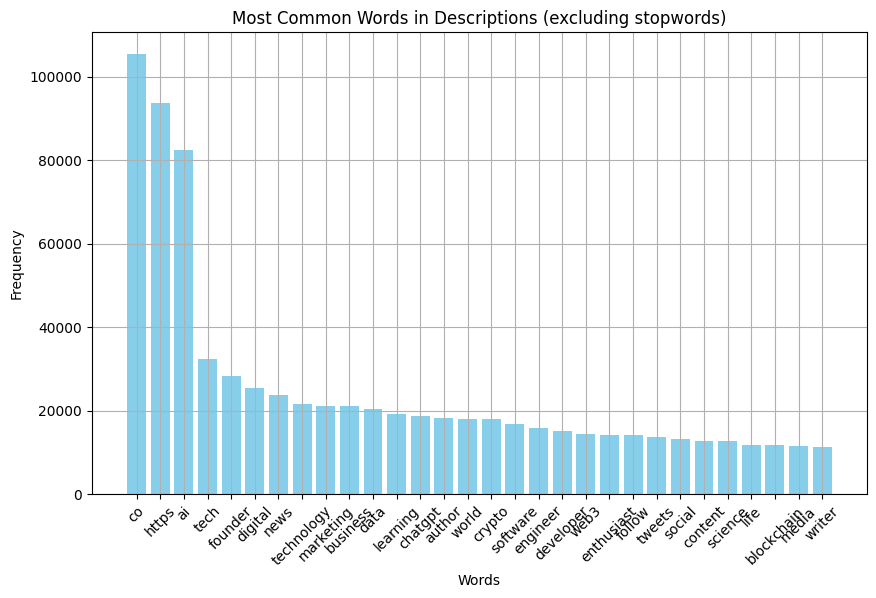

In [77]:
# Convert common words to a DataFrame for easier plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='skyblue')
plt.title('Most Common Words in Descriptions (excluding stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
